## 4. Fundamentals of Machine Learning

In [1]:
from keras.datasets import imdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras import regularizers

Using TensorFlow backend.


In [2]:
##########
# Ingestion
##########
VOCABULARY_SIZE = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCABULARY_SIZE)

##########
# Preprocessing
##########
def vectorize_sequences(sequences, dimension=VOCABULARY_SIZE):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Train-Validation Split
x_train__train, x_train__val, y_train__train, y_train__val = train_test_split(x_train, y_train, test_size=0.4,
                                                                             random_state=0)

### Overfitting & Underfitting
In machine learning, there is always a tension between optimisation and generalisation. Optimisation happens during learning, where a model is tuned to improve performance on the the training set, while generalisation is tested when the model is applied to new, unseen data. Although the model's value comes at the generalisation step, we unfortunately can only tune to improve optimisation. 

In the beginning of training a model, usually the training error and validation error are correlated. A lower training error corresponds to a lower validation error. This means the model is underfitting. However, soon the test error starts to increase even though the training error continues to decrease. The model is starting to optimise for the training error and performs poorer and poorer on test error. This is when the model overfits. We are overtuning it to maximise optimisation, and we start to learn irrelevant signals from the training data.

In [3]:
##########
# BASELINE MODEL - LEARNING
##########
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(VOCABULARY_SIZE,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train__train, y_train__train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_train__val, y_train__val), verbose=0)

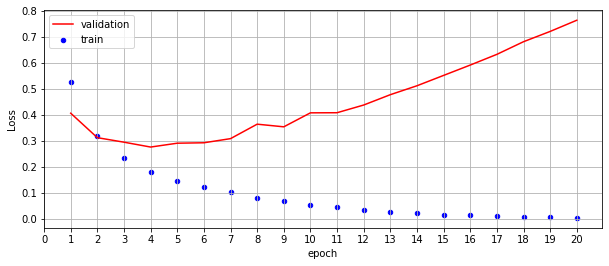

In [4]:
##########
# BASELINE MODEL - MODEL EVALUATION
##########
history_dict1 = history1.history
metrics_df1 = pd.DataFrame({'loss' : history_dict1['loss'], 'val_loss' : history_dict1['val_loss']})
metrics_df1['epoch'] = metrics_df1.index+1

fig, ax = plt.subplots(figsize=(10,4))
metrics_df1.plot(kind='scatter', x='epoch', y='loss', ax=ax, label='train', color='blue')
metrics_df1.plot(kind='line', x='epoch', y='val_loss', ax=ax, label='validation', color='red')
ax.set_ylabel("Loss")
ax.grid('GAINSBORO')
ax.legend(['validation', 'train', ])
ax.set_xticks(range(0,21))
plt.show()

Besides tuning the number of epochs, we can also tune the size of each layer. The number of parameters in a layer is the model's <b>capacity</b>. A model with a larger size has more <b>memorization capacity</b> and can identify more patterns, while a model with a smaller size has less ability to memorise information from the input data. The idea is to find the correct model size for the problem. Beyond that, we can also tune the number of layers to see if the model can generalise well, judged by the loss function.

In [5]:
##########
# MODELV1: BASELINE with smaller size - LEARNING
##########
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(VOCABULARY_SIZE,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_train__train, y_train__train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_train__val, y_train__val), verbose=0)

In [6]:
##########
# MODELV2: BASELINE with larger size - LEARNING
##########
model3 = models.Sequential()
model3.add(layers.Dense(512, activation='relu', input_shape=(VOCABULARY_SIZE,)))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(x_train__train, y_train__train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_train__val, y_train__val), verbose=0)

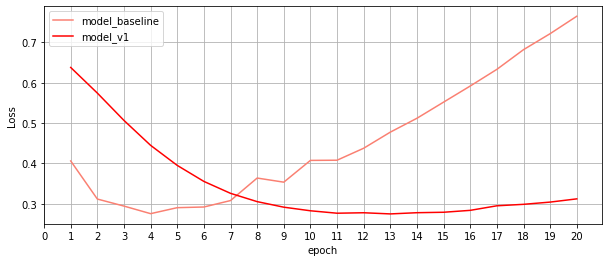

In [7]:
##########
# BASELINE vs V1 vs V2 MODEL EVALUATION
##########
history_dict2 = history2.history
metrics_df2 = pd.DataFrame({'loss' : history_dict2['loss'], 'val_loss' : history_dict2['val_loss']})
metrics_df2['epoch'] = metrics_df2.index+1

history_dict3 = history3.history
metrics_df3 = pd.DataFrame({'loss' : history_dict3['loss'], 'val_loss' : history_dict3['val_loss']})
metrics_df3['epoch'] = metrics_df3.index+1

fig, ax = plt.subplots(figsize=(10,4))
metrics_df1.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='salmon')
metrics_df2.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='red')
# metrics_df3.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='black')
ax.set_ylabel("Loss")
ax.grid('GAINSBORO')
ax.legend(['model_baseline', 'model_v1', ])
ax.set_xticks(range(0,21))
plt.show()

The smaller model overfits much more slowly, and its performance degrades much more slowly than the baseline. 

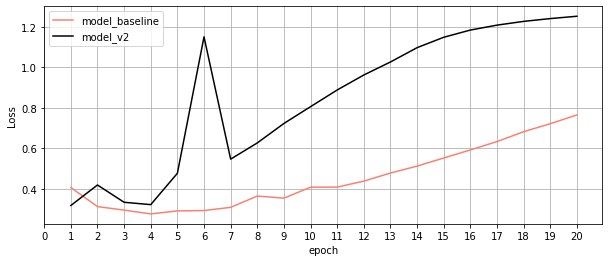

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
metrics_df1.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='salmon')
metrics_df3.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='black')
ax.set_ylabel("Loss")
ax.grid('GAINSBORO')
ax.legend(['model_baseline', 'model_v2', ])
ax.set_xticks(range(0,21))
plt.show()

The larger model overfits much more quickly, and its performance is almost consistenly worse than the baseline.

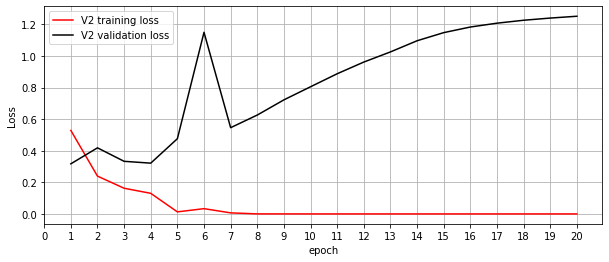

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
metrics_df3.plot(kind='line', x='epoch', y='loss', ax=ax, color='red')
metrics_df3.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='black')
ax.set_ylabel("Loss")
ax.grid('GAINSBORO')
ax.legend(['V2 training loss', 'V2 validation loss', ])
ax.set_xticks(range(0,21))
plt.show()

Observe that the training loss decays to 0 very quickly. The more capacity the model has, the more quickly it can model the training data, but then it is much more susceptible to overfitting (resultiing in huge difference in training loss vs. validation loss)

### Regularisation

Finally, there is one more way to mitigate overfitting, which is to regularise the model. Regularisation reduces variance across all the weights in a layer. There are 2 types: l1 and l2 regularisation (corresponding to the l1 and l2 norms) 

- In l1 regularisation, the cost is proportional to the sum of the absolute value of the weights
- In l2 regularisation, the cost is proportional to the sum of the square of the weights

In [10]:
##########
# MODELV3: BASELINE with l2 regularisation - LEARNING
##########
model4 = models.Sequential()
model4.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                        activation='relu', input_shape=(VOCABULARY_SIZE,)))
model4.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                        activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history4 = model4.fit(x_train__train, y_train__train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_train__val, y_train__val), verbose=0)

Here, `l2(0.001)` means every coefficient in the weight matrix ofhey layer will add `0.001 * weight_coefficient_value` to the total loss of the network, or $\lambda=0.001$.

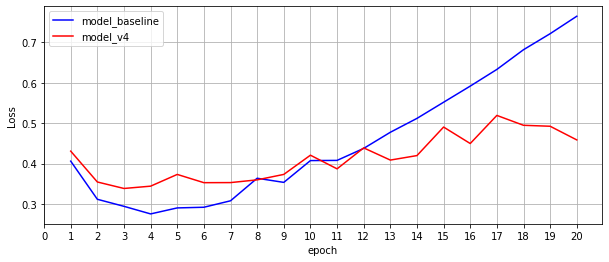

In [11]:
##########
# BASELINE vs V3 MODEL EVALUATION
##########
history_dict4 = history4.history
metrics_df4 = pd.DataFrame({'loss' : history_dict4['loss'], 'val_loss' : history_dict4['val_loss']})
metrics_df4['epoch'] = metrics_df4.index+1

fig, ax = plt.subplots(figsize=(10,4))
metrics_df1.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='blue')
metrics_df4.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='red')
ax.set_ylabel("Loss")
ax.grid('GAINSBORO')
ax.legend(['model_baseline', 'model_v4', ])
ax.set_xticks(range(0,21))
plt.show()

In [12]:
##########
# MODELV4: BASELINE with l1 regularisation - LEARNING
##########
model5 = models.Sequential()
model5.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), 
                        activation='relu', input_shape=(VOCABULARY_SIZE,)))
model5.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                        activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))
model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history5 = model5.fit(x_train__train, y_train__train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_train__val, y_train__val), verbose=0)

Here we can see the l2 regularisation makes the model less prone to overfitting, even with the same layer size.

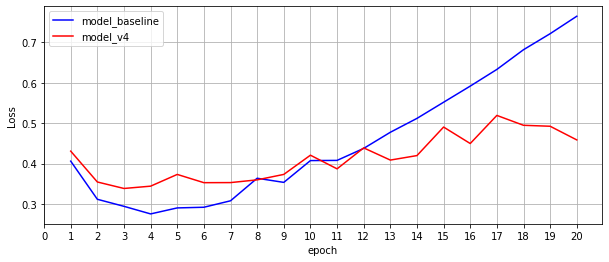

In [13]:
##########
# BASELINE vs V3 MODEL EVALUATION
##########
history_dict4 = history4.history
metrics_df4 = pd.DataFrame({'loss' : history_dict4['loss'], 'val_loss' : history_dict4['val_loss']})
metrics_df4['epoch'] = metrics_df4.index+1

fig, ax = plt.subplots(figsize=(10,4))
metrics_df1.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='blue')
metrics_df4.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='red')
ax.set_ylabel("Loss")
ax.grid('GAINSBORO')
ax.legend(['model_baseline', 'model_v4', ])
ax.set_xticks(range(0,21))
plt.show()

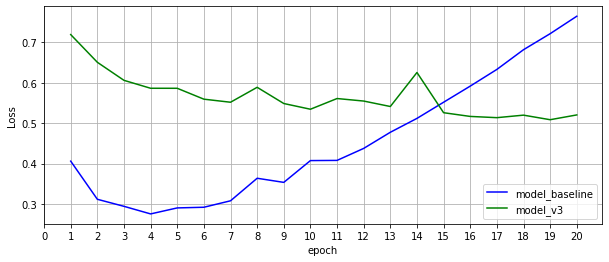

In [14]:
##########
# BASELINE vs V4 MODEL EVALUATION
##########
history_dict5 = history5.history
metrics_df5 = pd.DataFrame({'loss' : history_dict5['loss'], 'val_loss' : history_dict5['val_loss']})
metrics_df5['epoch'] = metrics_df5.index+1

fig, ax = plt.subplots(figsize=(10,4))
metrics_df1.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='blue')
metrics_df5.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='green')
ax.set_ylabel("Loss")
ax.grid('GAINSBORO')
ax.legend(['model_baseline', 'model_v3', 'model_v4', ])
ax.set_xticks(range(0,21))
plt.show()

Another regularisation technique is using dropout. Dropout, applied to a layer, randomly sets a number of output features to 0. The dropout rate is the fraction of features that are zero-ed.

In [15]:
##########
# MODELV5: BASELINE with 50% dropout - LEARNING
##########
model6 = models.Sequential()
model6.add(layers.Dense(16, 
                        activation='relu', input_shape=(VOCABULARY_SIZE,)))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(16, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(1, activation='sigmoid'))
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history6 = model6.fit(x_train__train, y_train__train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_train__val, y_train__val), verbose=0)

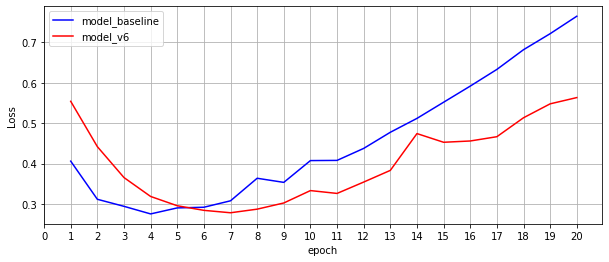

In [16]:
##########
# BASELINE vs V6 MODEL EVALUATION
##########
history_dict6 = history6.history
metrics_df6 = pd.DataFrame({'loss' : history_dict6['loss'], 'val_loss' : history_dict6['val_loss']})
metrics_df6['epoch'] = metrics_df6.index+1

fig, ax = plt.subplots(figsize=(10,4))
metrics_df1.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='blue')
metrics_df6.plot(kind='line', x='epoch', y='val_loss', ax=ax, color='red')
ax.set_ylabel("Loss")
ax.grid('GAINSBORO')
ax.legend(['model_baseline', 'model_v6', ])
ax.set_xticks(range(0,21))
plt.show()

Again, there is a clear improvement over the baseline.

### Universal Workflow of Machine Learning

Here are the general steps to solve any ML problem. They form as a summary to this chapter.

#### Define the problem, collect the dataset. 
- Identify the problem. Identify the branch of machine learning this goal is in.
- Know the inputs and outputs of the workflow

#### Choose a measure of success / performance metric.
To be able to control something, you must be able to observe it. How do you define the success of the solution? 
This can be RMSE for regression problems. This could also be ROC AUC, or precision / recall for classification problems or cross entropy loss

#### Data Prepartion & Splitting
Preprocess / Prepare data. This involves vectorisation / normalisation of data. Where necessary, imputation / feature engineering can be applied.

Then, determine how you will evaluate the model. You can use Train-Validation-Test Split or K-Fold split your dataset. Ensure here, your splits are a good representation of the universe, taking into account distribution of output.

#### Develop a baseline model.
First, determine a model that has statistical power. Anything that beat a random guess can be used. E.g. 50% accuracy for binary class problems. This could be a simple ML model (e.g. linear regression, decision tree) to beat the random guess.

#### Develop / Train / Tune neural network model.
This is when you select architecture of the neural network. 
- No. of layers
- Type of layers, Size of layers
- Epochs for training

At this stage, you can also tune
- feature selection
- more feature engineering

Finally, you can explore
- regularisation
- dropout
to obtain best model for validation. Ensure that as time goes by, your model does not ruthlessly only optimise for the validation set and then does not generalise well for the test set.

Once done, you can train the production model on all available data, then the test set. This is when you want to ensure the performance on the validation set and the test set are close. Otherwise you would be overfitting on the validation set.